In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt # visualization
import seaborn as sns # exploratory plots
plt.style.use('classic')
# pd.set_option('max_columns', 200)  # add this in case pandas doesn't show all columns while exploring

## Creating our dataframe

In [3]:
df = pd.read_csv('../input/investigative-wildfire-data-for-turkey-nasa/INVESTIGATIVE WILDFIRE DATA FOR TURKEY_NASA/LAST YEARS ALL COUNTRIES/fire_nrt_M_C61_212465_all_countries.csv')

## Some basic understanding of the data

In [4]:
df.shape

(312856, 14)

*so we have around 312000 rows and 14 columns*

In [5]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,68.180,161.799,324.5,2.1,1.4,2021-07-20,5,Aqua,MODIS,83,6.1NRT,291.2,61.0,D
1,67.882,161.817,308.7,2.1,1.4,2021-07-20,5,Aqua,MODIS,64,6.1NRT,292.5,22.5,D
2,67.894,161.856,310.6,2.1,1.4,2021-07-20,5,Aqua,MODIS,53,6.1NRT,291.8,25.8,D
3,67.883,161.822,311.3,2.1,1.4,2021-07-20,5,Aqua,MODIS,61,6.1NRT,292.6,27.1,D
4,67.895,161.862,307.5,2.1,1.4,2021-07-20,5,Aqua,MODIS,0,6.1NRT,291.7,17.7,D


**Lets have the columns listed**

In [6]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight'],
      dtype='object')

In [7]:
df.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [8]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,312856.000000,312856.000000,312856.000000,312856.000000,312856.000000,312856.000000,312856.000000,312856.000000,312856.000000
mean,16.703438,27.939299,327.643642,1.621186,1.216886,1084.059411,67.889837,299.303665,59.916431
std,33.988244,74.667894,21.180231,0.817317,0.245783,502.609840,23.166032,7.938463,164.268915
min,-45.659060,-175.395970,300.000000,1.000000,1.000000,0.000000,0.000000,265.600000,0.000000
25%,-10.550000,15.160000,315.420000,1.060000,1.020000,712.000000,53.000000,294.500000,12.700000
50%,-4.966020,25.317720,322.600000,1.280000,1.110000,1155.000000,70.000000,299.830000,23.930000
75%,56.923250,110.811993,333.470000,1.860000,1.330000,1301.000000,86.000000,304.130000,50.750000
max,80.304280,179.395630,508.500000,4.820000,2.000000,2358.000000,100.000000,400.100000,9732.200000


## Data preperation

    The file in hand considers all countries from the 20th of July to the 1st of August
    So, we need to prep the data to fit the following criteria:
* Only include data for spots within Turkey
* Consider dates from 28th July (when the fire in Manavgat started)
* Include only readings from 'Terra' satellite since it observes land and atmospheric conditions
* For the version, we want to use Collection 1 Standard Processing ("1.0") since it involves a more comprehensive and thorough analysis, which might include additional quality checks and data corrections.

In [9]:
df['version'].unique()

array(['6.1NRT'], dtype=object)

*Unfortunatly, only NRT (Near Real Time) version is available, will just work with that*

In [10]:
df['satellite'].unique()

array(['Aqua', 'Terra'], dtype=object)

**Now we'll filter out the Terra satellite images**

In [11]:
# Filtering out satellite
Terra = df[df['satellite'] == 'Terra']

### Upto here we have Terra satellite filtered

In [12]:
# Creating a branch to adjust the date time format
Branch = Terra.copy()

In [13]:
Branch['acq_date'] = pd.to_datetime(Branch['acq_date'], format='%Y-%m-%d')

In [14]:
# specifying date range

filtered_date = Branch[(Branch['acq_date'].between('2021-07-28','2021-08-01'))]

In [15]:
filtered_date.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
172565,63.89048,-22.23048,305.32,4.71,1.99,2021-07-28,24,Terra,MODIS,27,6.1NRT,274.51,109.26,N
172566,54.11894,159.73596,307.28,1.04,1.02,2021-07-28,41,Terra,MODIS,0,6.1NRT,291.53,5.21,D
172567,48.90952,139.54497,315.84,4.64,1.97,2021-07-28,43,Terra,MODIS,65,6.1NRT,289.81,92.74,D
172568,48.29206,153.26427,313.44,1.04,1.02,2021-07-28,43,Terra,MODIS,54,6.1NRT,296.91,12.15,D
172569,-12.20542,142.52007,314.20,1.17,1.08,2021-07-28,58,Terra,MODIS,47,6.1NRT,297.95,9.74,D


### Now we have the date range and Terra satellite filtered

In [16]:
# Setting the coordinate boundries for Turkey
lat_min, lat_max = 36.0, 42.0
lon_min, lon_max = 26.0, 45.0

In [17]:
fd = filtered_date

Turkey = fd[(fd['latitude'] >= lat_min) & (fd['latitude'] <= lat_max) &
                 (fd['longitude'] >= lon_min) & (fd['longitude'] <= lon_max)]

In [18]:
Turkey.describe()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp
count,851.000000,851.000000,851.000000,851.000000,851.000000,851,851.000000,851.000000,851.000000,851.000000
mean,36.954558,32.012315,343.123796,2.056639,1.338872,2021-07-29 20:30:10.575793152,1432.788484,84.688602,307.499330,182.978202
min,36.018410,27.677350,301.360000,1.000000,1.000000,2021-07-28 00:00:00,752.000000,0.000000,291.350000,0.000000
25%,36.760495,31.334685,322.335000,1.060000,1.030000,2021-07-29 00:00:00,837.000000,77.000000,301.925000,24.535000
50%,36.885170,31.603820,336.140000,1.700000,1.280000,2021-07-30 00:00:00,1908.000000,95.000000,306.180000,61.610000
75%,36.985905,33.275305,354.755000,2.950000,1.635000,2021-07-31 00:00:00,2004.000000,100.000000,311.855000,153.680000
max,41.405250,44.741550,499.970000,4.820000,2.000000,2021-08-01 00:00:00,2046.000000,100.000000,348.890000,4816.680000
std,0.697494,2.983882,29.383495,1.129395,0.321284,NaN,572.161053,21.737159,7.476355,398.153282


### Now we have the data filtered to Turkey, between 28th July and 1st August and from the Terra satellite

## Data Preprocessing

In [19]:
# Checking for Null

Turkey.isna().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

*Great, we don't have any null values*

In [20]:
# Checking for duplicated values, specifically readings for the same spot at the same time
Turkey.duplicated(subset = ['latitude','longitude','acq_date','acq_time']).sum()

0

*Nice, our data is not troublesome so we can move forward*

## Feature Understanding

**Univariate Analysis**
* Plotting feature distrubitions
    * Histogram
    * KDE
    * Boxplot

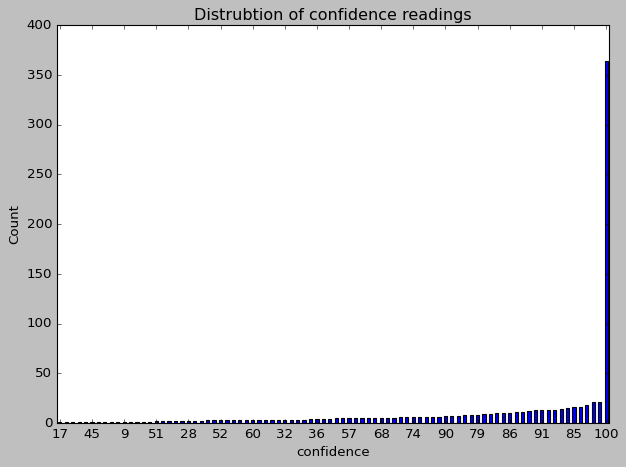

In [21]:
ax = Turkey['confidence'].value_counts() \
    .plot(kind='bar', title = 'Distrubtion of confidence readings')

ax.set_ylabel('Count')

# Customize the x-axis ticks
tick_positions = range(0, len(Turkey['confidence'].value_counts()), 5)  # Adjust the step as needed
tick_labels = [Turkey['confidence'].value_counts().index[i] for i in tick_positions]

plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=0)  # Rotate x-axis labels to horizontal
plt.gca().invert_xaxis()  # Invert the x-axis if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

Remember that confidence refers to how sure the algorithm is about a pixel reflecting a fire/hotspot, so we have alot of that

Text(0.5, 0, 'Brightness (in Kelvin)')

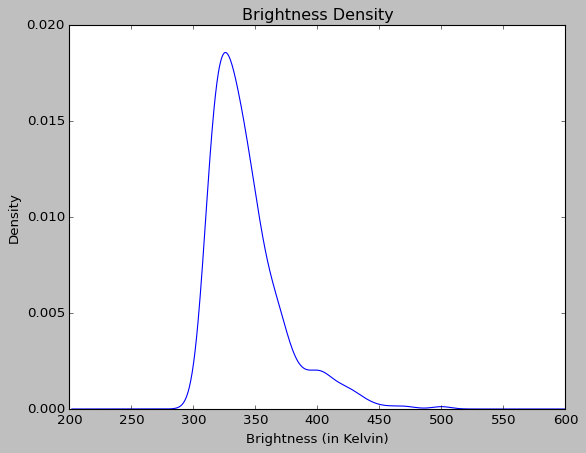

In [22]:
ax = Turkey['brightness'].plot(kind='density', title = 'Brightness Density')

ax.set_xlabel('Brightness (in Kelvin)')

Text(0, 0.5, 'Frequency')

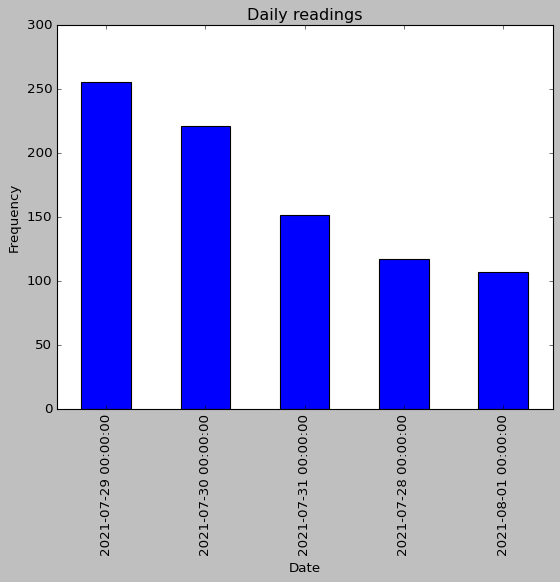

In [23]:
ax = Turkey['acq_date'].value_counts() \
                    .plot(kind = 'bar', title = 'Daily readings')

ax.set_xlabel('Date')
ax.set_ylabel('Frequency')

Text(0.5, 0, 'Brightness temperature (kelvin)')

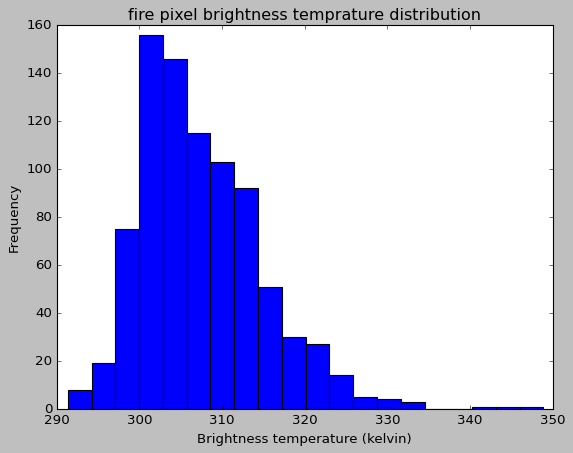

In [24]:
ax = Turkey['bright_t31'].plot(kind = 'hist', bins = 20, title = 'fire pixel brightness temprature\
 distribution')

ax.set_xlabel('Brightness temperature (kelvin)')

Text(0.5, 0, 'Mega Watts')

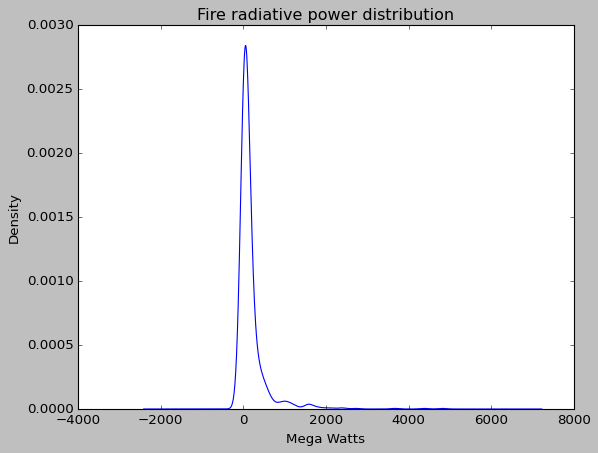

In [25]:
ax = Turkey['frp'].plot(kind = 'kde', title = 'Fire radiative power distribution')

ax.set_xlabel('Mega Watts')

> Fire Radiative Power (FRP) values vary depending on the intensity of the fire. Generally, higher FRP values indicate more intense fires. Here's a rough guideline for interpreting FRP values:

* Low FRP (<10 MW): These values typically correspond to smaller or less intense fires. Such hotspots might represent controlled burns, small vegetation fires, or other minor fire events.

* Moderate FRP (10-100 MW): These values indicate more substantial fires. This range can represent significant wildfires with moderate intensity.

* High FRP (>100 MW): These values are associated with very intense fires. High FRP values can indicate large-scale wildfires that burn with high intensity and are likely causing significant damage.

In [26]:
from scipy import stats

# Method 1: Using IQR
Q1 = Turkey['frp'].quantile(0.25)
Q3 = Turkey['frp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_iqr = Turkey[(Turkey['frp'] < lower_bound) | (Turkey['frp'] > upper_bound)].copy()
num_outliers_iqr = outliers_iqr.shape[0]

print(f'Number of outliers using IQR: {num_outliers_iqr}')

# Method 2: Using Z-score
z_scores = np.abs(stats.zscore(Turkey['frp']))
outliers_z = Turkey[(z_scores > 3)]
num_outliers_z = outliers_z.shape[0]

print(f'Number of outliers using Z-score: {num_outliers_z}')


Number of outliers using IQR: 104
Number of outliers using Z-score: 19


However our data is not normally distributed so we will be using IQR

## Feature Relationships

In [31]:
Turkey = Turkey.rename(columns={'brightness': 'bright_t4'})
Turkey.head()

,latitude,longitude,bright_t4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
178890,40.08292,32.97380,321.22,1.30,1.13,2021-07-28,858,Terra,MODIS,49,6.1NRT,307.60,6.17,D
178893,40.76775,32.21832,318.29,1.18,1.08,2021-07-28,858,Terra,MODIS,65,6.1NRT,305.83,6.16,D
178894,40.78251,31.19394,318.61,1.08,1.04,2021-07-28,858,Terra,MODIS,65,6.1NRT,304.48,10.15,D
178895,40.71914,30.40054,319.25,1.04,1.02,2021-07-28,858,Terra,MODIS,33,6.1NRT,305.47,8.65,D
178896,40.76315,30.64630,319.84,1.05,1.02,2021-07-28,858,Terra,MODIS,59,6.1NRT,305.93,10.68,D


> we're trying to find relationships between fire indicators and other possible factors, so possible combinations are:

* bright_t4 vs frp
* bright_t4 vs date & confidence hue
* bright_t31 vs date
* frp vs date & confidence hue
* latitude vs longitude & bright_t4

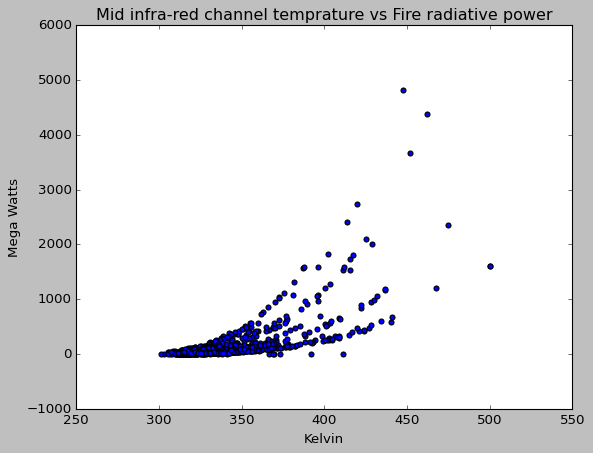

In [39]:
ax =Turkey.plot(kind = 'scatter',
            x = 'bright_t4',
            y = 'frp',
            title = 'Mid infra-red channel temprature vs Fire radiative power')

ax.set_xlabel('Kelvin')
ax.set_ylabel('Mega Watts')
plt.show()

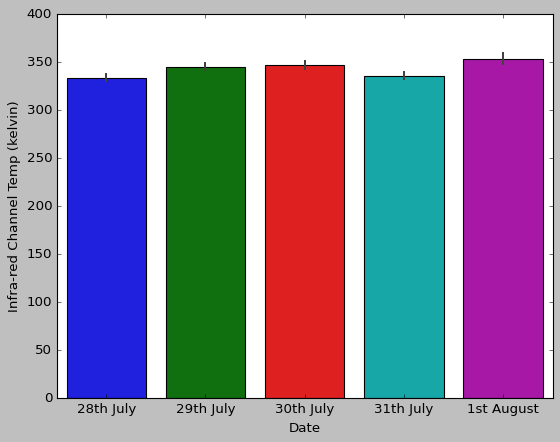

In [46]:
ax = sns.barplot(x = 'acq_date',
                 y= 'bright_t4',
                 data = Turkey)

ax.set_xticklabels(['28th July','29th July',
                    '30th July','31th July','1st August'])

ax.set_xlabel('Date')
ax.set_ylabel('Infra-red Channel Temp (kelvin)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and w

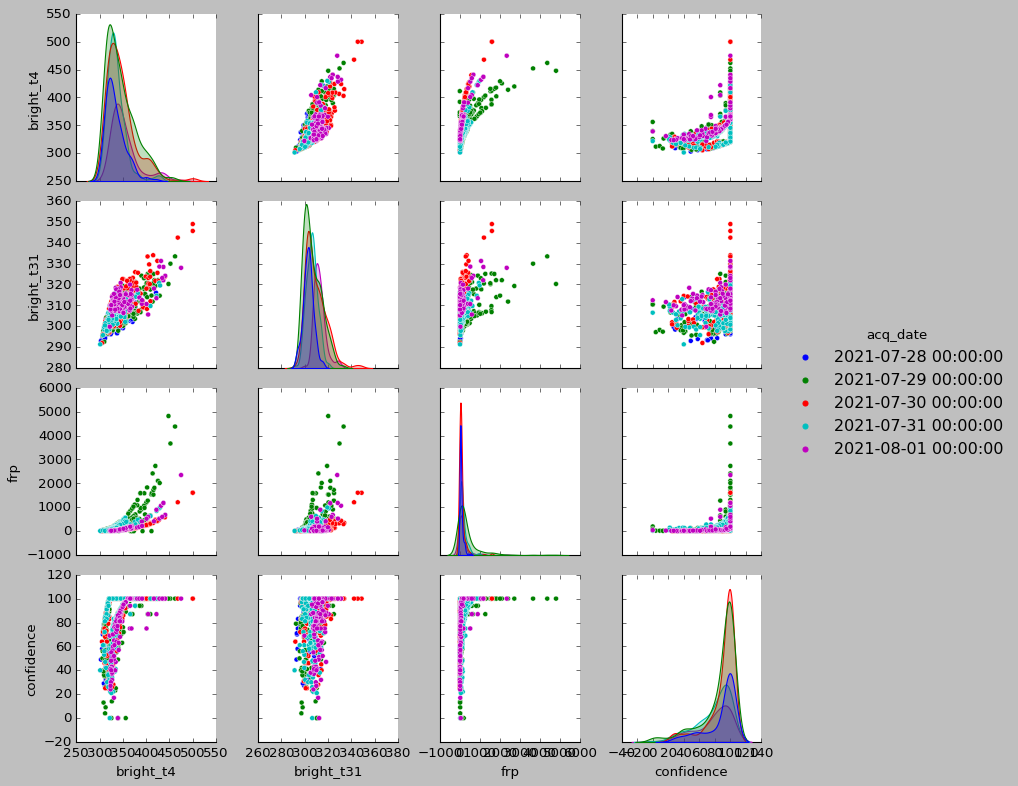

In [52]:
sns.pairplot(Turkey, vars = ['bright_t4','bright_t31','frp','confidence'],
             hue = 'acq_date')
plt.savefig("pair_plot.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()

fix axis ticks and save

> ### Checking correlations

In [57]:
corr = Turkey[['bright_t4','bright_t31','frp',
               'confidence']].dropna().corr()
corr

,bright_t4,bright_t31,frp,confidence
bright_t4,1.000000,0.764644,0.684525,0.403915
bright_t31,0.764644,1.000000,0.427555,0.105167
frp,0.684525,0.427555,1.000000,0.223831
confidence,0.403915,0.105167,0.223831,1.000000


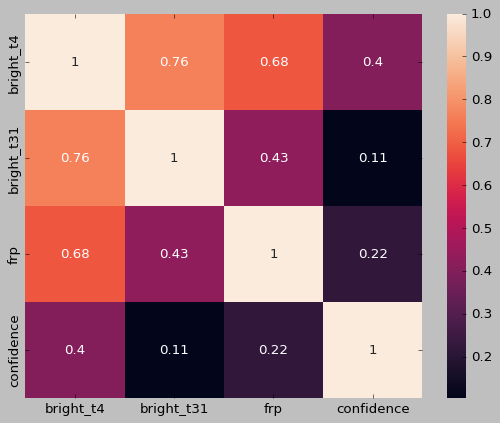

In [60]:
sns.heatmap(corr, annot = True)
plt.show()